In [37]:
# Concept drift example
# drift in data

# ADWIN is a method that detects data drift over a stream of data. 
# ADWIN works by keeping track of several statistical properties of data within 
# an adaptive window that automatically grows and shrinks.

import numpy as np
from skmultiflow.drift_detection.adwin import ADWIN

adwin = ADWIN(delta=0.0002)
#SEED = np.random.seed(42)

# Simulating a data stream as a normal distribution of 1's and 0's
data_stream = np.random.randint(2, size=4000)
#mu, sigma = 0, 0.25  # mean and standard deviation
#data_stream = np.random.normal(mu, sigma, 4000)

print(data_stream)
print(data_stream[1000:2000])

[0 0 1 ... 0 0 1]
[0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1
 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1
 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 0 1 

In [38]:
# Artificially change the data concept from index 1000 to 2000
for i in range(999, 2000):
    data_stream[i] = np.random.randint(5, high=10)

print(data_stream)
print(data_stream[1000:2000])

[0 0 1 ... 0 0 1]
[8 6 6 8 9 6 6 7 8 6 9 5 8 7 6 9 8 9 9 7 8 6 7 6 5 9 5 9 7 6 6 7 8 5 5 6 6
 6 7 8 5 9 7 5 8 7 5 7 5 5 8 9 8 5 7 8 9 5 8 8 8 8 7 9 9 5 6 7 5 5 8 6 6 7
 6 5 6 6 9 5 6 6 8 6 6 9 5 7 5 8 5 6 8 5 8 7 5 6 8 9 8 9 6 7 9 7 8 6 9 8 5
 8 7 6 6 8 5 7 8 8 6 7 5 6 8 6 6 9 6 6 7 6 5 8 7 6 5 8 7 5 6 9 9 7 5 8 5 9
 7 6 5 9 8 7 6 5 8 6 9 9 8 9 7 8 9 5 9 7 6 6 9 6 9 7 6 5 9 6 7 7 5 7 7 6 9
 8 7 7 8 7 6 6 8 7 7 9 7 6 5 5 5 5 7 7 9 7 5 8 8 6 6 7 8 5 5 5 7 7 9 5 5 7
 7 9 9 6 8 5 5 9 9 6 8 6 8 5 6 9 6 6 5 9 9 7 7 7 5 6 9 9 6 9 6 5 5 5 6 6 8
 9 9 8 8 5 8 6 7 6 8 9 6 9 6 9 6 9 7 5 6 7 5 6 7 7 7 8 9 5 9 9 9 7 9 8 6 7
 5 6 6 6 9 9 7 9 9 9 7 7 8 8 8 8 6 6 8 8 5 6 5 5 9 7 6 8 8 7 6 8 8 9 5 8 6
 7 9 6 9 5 8 6 7 5 5 9 5 6 9 5 7 6 7 7 9 8 9 6 6 9 8 9 6 8 6 8 8 9 9 9 8 8
 6 7 9 6 6 5 9 6 5 9 8 5 8 7 7 7 7 6 7 6 6 9 6 6 7 6 8 7 5 7 6 8 7 8 5 5 9
 9 7 9 8 9 8 9 9 9 6 6 9 8 7 5 6 9 5 6 7 8 9 7 6 9 5 8 6 8 9 7 8 5 6 5 8 7
 7 5 9 9 7 5 5 5 8 9 9 8 6 8 5 8 5 7 5 9 8 5 6 7 6 6 6 7 7 7 7 6 9 9 7 8 5
 8 8 8 

In [39]:
width_vs_variance = []

# Add the stream elements to ADWIN and verifying if drift occurred
for idx, d in enumerate(data_stream):
    adwin.add_element(d)
    if adwin.detected_change():
        print(f'Change in index {idx} for stream value {d}')
    width_vs_variance.append((adwin.width, adwin.variance, idx))

for i in width_vs_variance:
    print(i)

Change in index 1023 for stream value 6
Change in index 1055 for stream value 8
Change in index 1087 for stream value 7
Change in index 2047 for stream value 1
Change in index 2079 for stream value 0
Change in index 2271 for stream value 0
(1, 0.0, 0)
(2, 0.0, 1)
(3, 0.2222222222222222, 2)
(4, 0.25, 3)
(5, 0.24, 4)
(6, 0.25, 5)
(7, 0.24489795918367346, 6)
(8, 0.234375, 7)
(9, 0.2222222222222222, 8)
(10, 0.21000000000000002, 9)
(11, 0.19834710743801656, 10)
(12, 0.18750000000000003, 11)
(13, 0.1775147928994083, 12)
(14, 0.1683673469387755, 13)
(15, 0.16, 14)
(16, 0.1875, 15)
(17, 0.20761245674740483, 16)
(18, 0.2006172839506173, 17)
(19, 0.21606648199445985, 18)
(20, 0.22750000000000004, 19)
(21, 0.22222222222222224, 20)
(22, 0.2169421487603306, 21)
(23, 0.2117202268431002, 22)
(24, 0.20659722222222224, 23)
(25, 0.20160000000000003, 24)
(26, 0.19674556213017758, 25)
(27, 0.20850480109739372, 26)
(28, 0.20408163265306126, 27)
(29, 0.21403091557669443, 28)
(30, 0.21000000000000002, 29)
(3

(129, 5.5134494621717565, 1120)
(130, 5.472581360946757, 1121)
(131, 5.449096060835627, 1122)
(132, 5.410023530762179, 1123)
(133, 5.385299479902776, 1124)
(134, 5.347342114056595, 1125)
(135, 5.309914266117981, 1126)
(136, 5.315014057093437, 1127)
(137, 5.278481139112378, 1128)
(138, 5.242445127074156, 1129)
(139, 5.206171393820207, 1130)
(140, 5.171160714285725, 1131)
(141, 5.151403978673116, 1132)
(142, 5.1300523209680735, 1133)
(143, 5.0955884150814335, 1134)
(144, 5.0623070987654435, 1135)
(145, 5.043819857312734, 1136)
(146, 5.023814270970174, 1137)
(147, 4.991019366930456, 1138)
(148, 4.973440924032151, 1139)
(149, 4.942009931985057, 1140)
(150, 4.9492388888889, 1141)
(151, 4.9558434937064275, 1142)
(152, 4.924450311634359, 1143)
(153, 4.9083178478363125, 1144)
(154, 4.889784322820048, 1145)
(155, 4.874066077003133, 1146)
(156, 4.880701429980286, 1147)
(157, 4.8507469877074225, 1148)
(158, 4.822158908828724, 1149)
(159, 4.807352853921928, 1150)
(160, 4.81410156250001, 1151)
(161

(604, 3.9835225154598524, 2619)
(605, 3.9773425653985424, 2620)
(606, 3.97118167881145, 2621)
(607, 3.965061480693397, 2622)
(608, 3.958941092451527, 2623)
(609, 3.952839488946593, 2624)
(610, 3.9467807712980423, 2625)
(611, 3.940740508838242, 2626)
(612, 3.9346999284463275, 2627)
(613, 3.9286990478192756, 2628)
(614, 3.922697787244431, 2629)
(615, 3.9167147531231445, 2630)
(616, 3.910773581126669, 2631)
(617, 3.9048503174507307, 2632)
(618, 3.898926553450428, 2633)
(619, 3.8930415347595426, 2634)
(620, 3.8871741675338214, 2635)
(621, 3.8813088144154824, 2636)
(622, 3.875461055510181, 2637)
(623, 3.8696308121784275, 2638)
(624, 3.8638180062458933, 2639)
(625, 3.858022560000003, 2640)
(626, 3.8522443961865513, 2641)
(627, 3.8465139623380646, 2642)
(628, 3.8407725719096137, 2643)
(629, 3.835078549745858, 2644)
(630, 3.829401297556062, 2645)
(631, 3.8237156263421106, 2646)
(632, 3.818074276958823, 2647)
(633, 3.812424505040071, 2648)
(634, 3.8068187189642675, 2649)
(635, 3.801204507409017

(1604, 1.6550407219171521, 3619)
(1605, 1.6541839898681108, 3620)
(1606, 1.653328107625669, 3621)
(1607, 1.65243744890993, 3622)
(1608, 1.6515477262320237, 3623)
(1609, 1.6506952472902383, 3624)
(1610, 1.6498436113575863, 3625)
(1611, 1.6489573688572623, 3626)
(1612, 1.6480720549661654, 3627)
(1613, 1.647187668274931, 3628)
(1614, 1.6463406757630334, 3629)
(1615, 1.64545847750865, 3630)
(1616, 1.6446135795510237, 3631)
(1617, 1.643733561620521, 3632)
(1618, 1.6428907504572319, 3633)
(1619, 1.6420487667487798, 3634)
(1620, 1.6412076093583288, 3635)
(1621, 1.6403672771508735, 3636)
(1622, 1.6394931798589365, 3637)
(1623, 1.6386549168624611, 3638)
(1624, 1.637817474641461, 3639)
(1625, 1.6369808520710052, 3640)
(1626, 1.6361113853297198, 3641)
(1627, 1.6352428187292716, 3642)
(1628, 1.634375150921526, 3643)
(1629, 1.6335083805608965, 3644)
(1630, 1.6326425063043386, 3645)
(1631, 1.6317775268113464, 3646)
(1632, 1.630949109116685, 3647)
(1633, 1.6301214961699686, 3648)
(1634, 1.62929468687

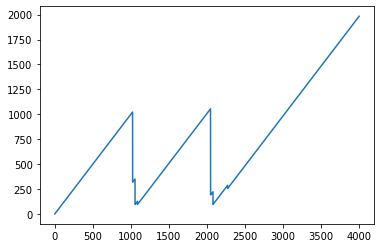

In [46]:
import matplotlib.pyplot as plt
width = []
for w in width_vs_variance:
    width.append(w[0])
plt.plot(width)
plt.show()